In [ ]:
# ============================================================
# EDA FOR PORT AUTHORITY DATASETS
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

tqdm.pandas()  # enable progress bar for pandas operations
sns.set(style="whitegrid")

In [ ]:
# --- Load your cleaned datasets
# List of files to load with descriptions
load_tasks = [
    ('EDA_All_Recording_Traffic.parquet', lambda: pd.read_parquet('EDA_Ready_All_Recording_Traffic.parquet'), 'All Recorded Traffic'),
    ('Facility Mobility Speeds.txt', lambda: pd.read_csv('Facility Mobility Speeds.txt', sep='\t'), 'Facility Mobility Speeds'),
    ('Merged_PABT_Bus_Passenger.csv', lambda: pd.read_csv('data/Output/Merged_PABT_Bus_Passenger_For_PowerBI.csv'), 'PABT Bus & Passenger')
]

loaded_data = {}

print("\nLoading datasets with progress:")
for filename, func, desc in tqdm(load_tasks, desc="Loading files", unit="file"):
    loaded_data[desc] = func()
    
# Assign to variables
traffic = loaded_data['All Recorded Traffic']
mobility = loaded_data['Facility Mobility Speeds']
bus_pass = loaded_data['PABT Bus & Passenger']

print("\nAll datasets loaded successfully.")


In [ ]:
# Show floats in fixed-point notation with 2 decimals
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
# --- FUNCTION TO COMPUTE BASIC EDA
def basic_eda(df, name):
    print(f"\n========== EDA for {name} ==========")
    
    # Null values
    print("\nNull values per column:")
    print(df.isnull().sum())
    
    # Zero-length strings for object columns
    obj_cols = df.select_dtypes('object').columns
    print("\nZero-length strings per column:")
    for c in obj_cols:
        print(f"{c}: {(df[c].astype(str).str.len() == 0).sum()}")
    
    # Distinct values
    print("\nNumber of distinct values per column:")
    print(df.nunique())
    
    # Leading/trailing spaces for object columns
    print("\nLeading/trailing spaces per column:")
    for c in obj_cols:
        leading = df[c].astype(str).str.startswith(' ').sum()
        trailing = df[c].astype(str).str.endswith(' ').sum()
        if leading + trailing > 0:
            print(f"{c}: leading={leading}, trailing={trailing}")
    
    # Duplicate records
    print("\nDuplicate rows:", df.duplicated().sum())
    
    # Numeric statistics
    num_cols = df.select_dtypes(include=np.number).columns
    print("\nNumeric summary:")
    print(df[num_cols].describe())

    
    # Visualize the correlation matrix
    
    # Select numeric columns for correlation by default
    corr_cols = df.select_dtypes(include=np.number).columns.tolist()

    # Select only the relevant columns for correlation
    if name == 'All Recorded Traffic':
        # Visualize the correlation matrix for the relevant columns only
        corr_cols = [
            'TOTAL', 
            'CASH', 
            'EZPASS', 
            'VIOLATION', 
            'Autos', 
            'Small_T', 
            'Large_T', 
            'Buses'
        ]
    
    # Filter the dataframe for those columns (remove columns not present in your data as necessary)
    df_corr = df[corr_cols]
    
    # Compute and plot the correlation matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(df_corr.corr(), annot=False, cmap="coolwarm")
    plt.title('Filtered Correlation Matrix')
    plt.show()

    # --- PLOTS ---
    # Histograms
    for col in num_cols:
        plt.figure(figsize=(6,4))
        sns.histplot(df[col].dropna(), kde=False, bins=30)
        plt.title(f'{name} - {col} Distribution')
        plt.show()
    
    # Boxplots for numeric columns
    for col in num_cols:
        plt.figure(figsize=(6,4))
        sns.boxplot(x=df[col])
        plt.title(f'{name} - {col} Boxplot')
        plt.show()
    
    # Scatter plots for interesting relationships
    if 'Total' in df.columns:
        plt.figure(figsize=(6,4))
        sns.scatterplot(x='Total', y='Buses', data=df)
        plt.title(f'{name} - Total vs Buses')
        plt.show()
    
    if 'Volume_Bus' in df.columns and 'Volume_Passenger' in df.columns:
        plt.figure(figsize=(6,4))
        sns.scatterplot(x='Volume_Bus', y='Volume_Passenger', data=df)
        plt.title(f'{name} - Volume_Bus vs Volume_Passenger')
        plt.show()


========== EDA for All Recorded Traffic ==========

Null values per column:
DAY               0
DATE              0
FAC               0
LANE              0
TIME              0
TOTAL             0
CLASS 1           0
CLASS 2           0
CLASS 3           0
CLASS 4           0
CLASS 5           0
CLASS 6           0
CLASS 7           0
CLASS 8           0
CLASS 9           0
CLASS 11          0
CASH              0
EZPASS            0
VIOLATION         0
LANEMODE          0
FAC_B             0
Autos             0
Small_T           0
Large_T           0
Buses             0
FAC_G             0
Day_Name          0
TIME_parsed       0
DATETIME          0
class_sum         0
class_mismatch    0
dtype: int64

Zero-length strings per column:
DAY: 0
FAC: 0
LANE: 0
TIME: 0
LANEMODE: 0
FAC_B: 0
FAC_G: 0
Day_Name: 0
TIME_parsed: 0

Number of distinct values per column:
DAY                    7
DATE                4534
FAC                    8
LANE                  37
TIME                  24
TOTAL 

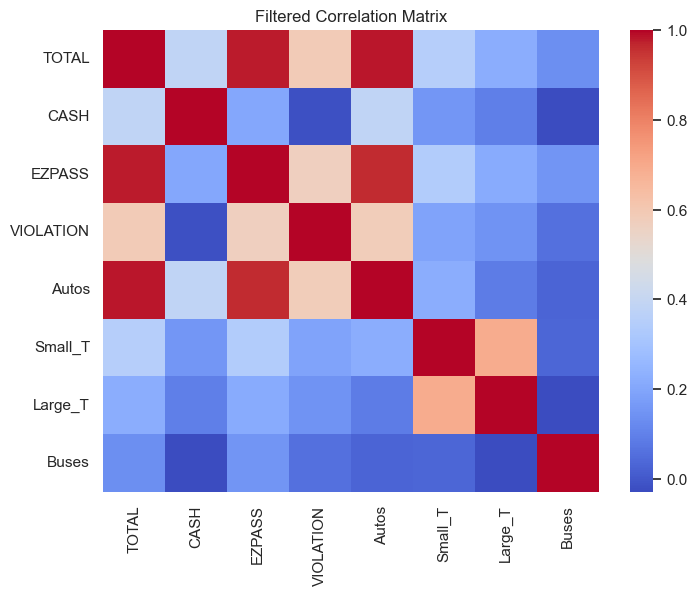

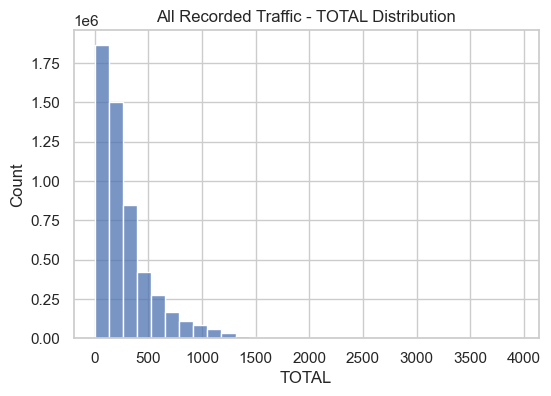

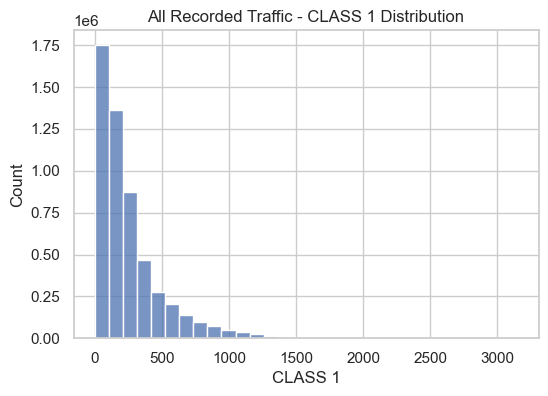

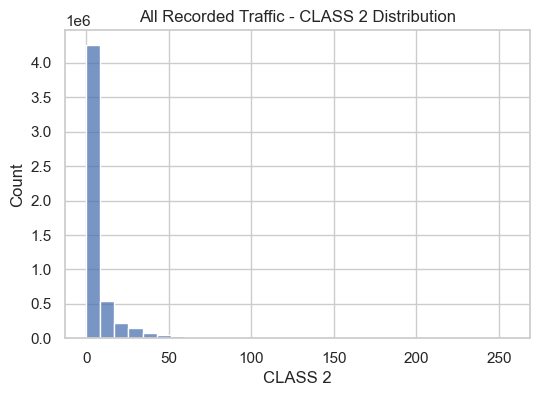

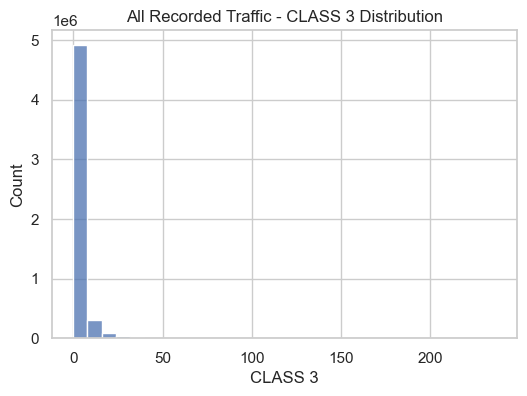

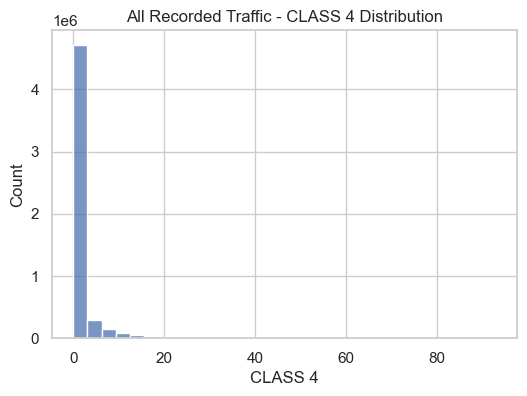

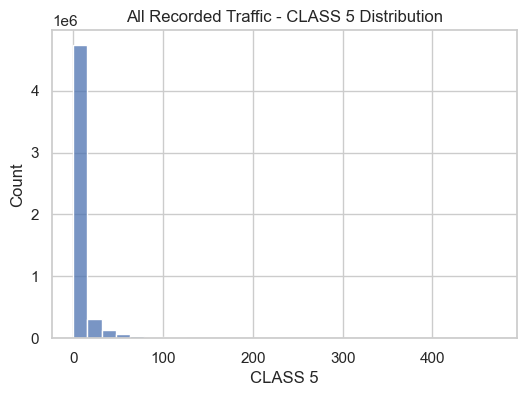

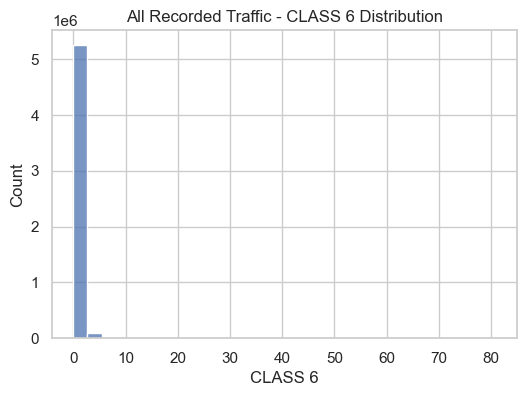

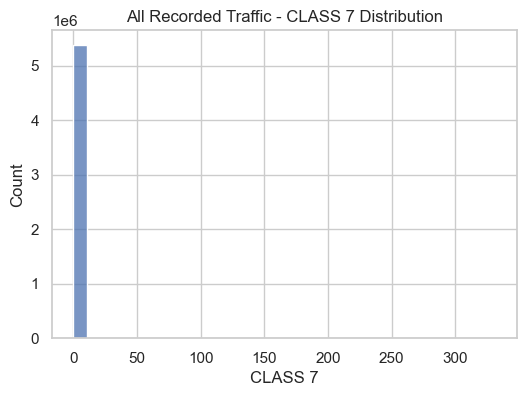

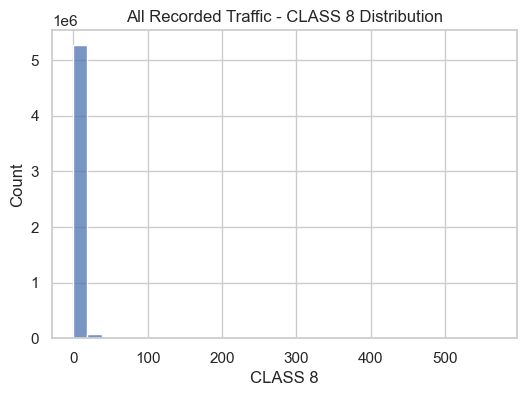

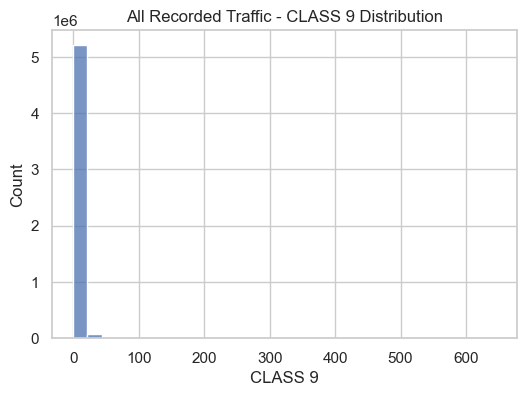

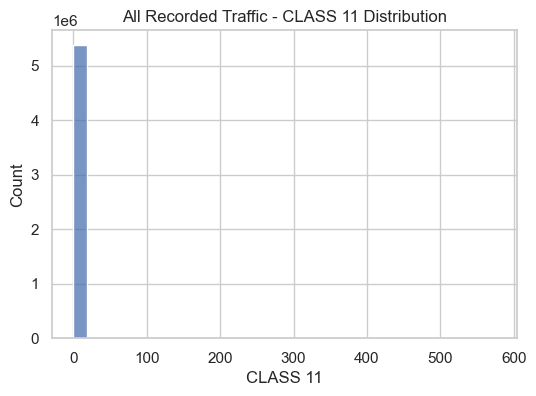

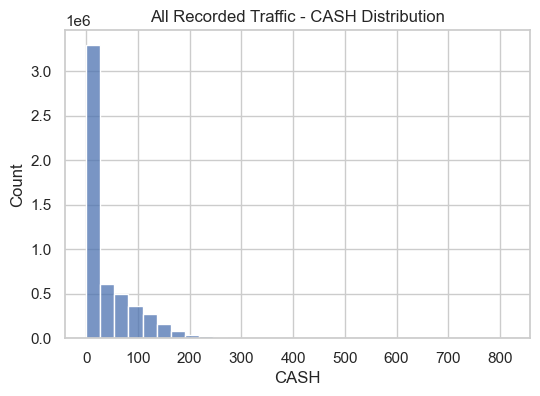

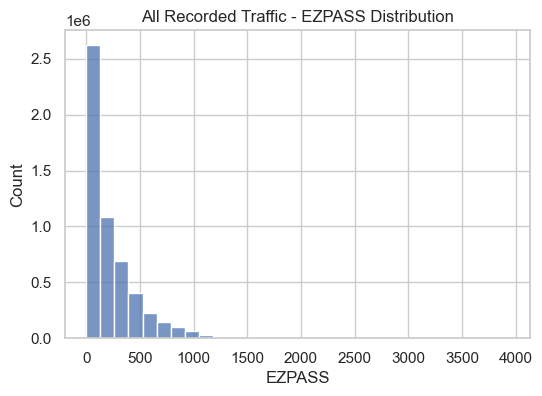

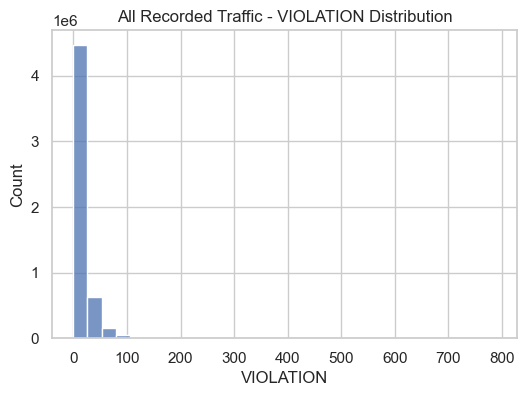

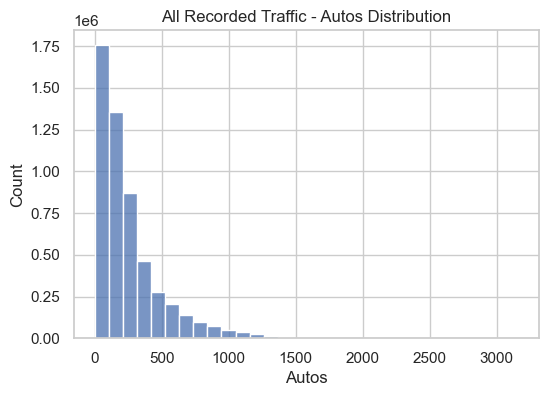

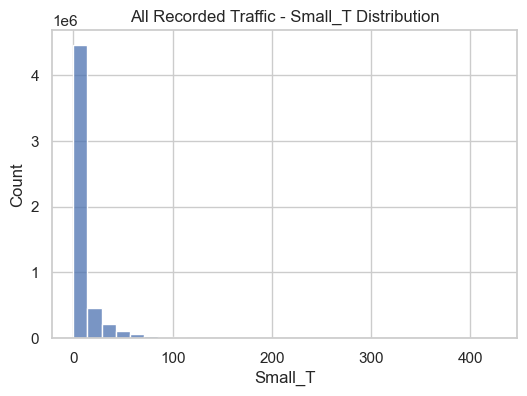

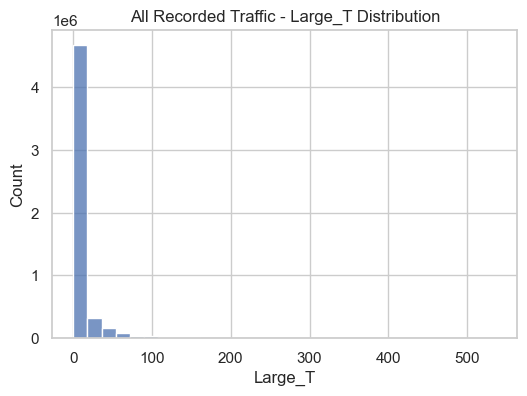

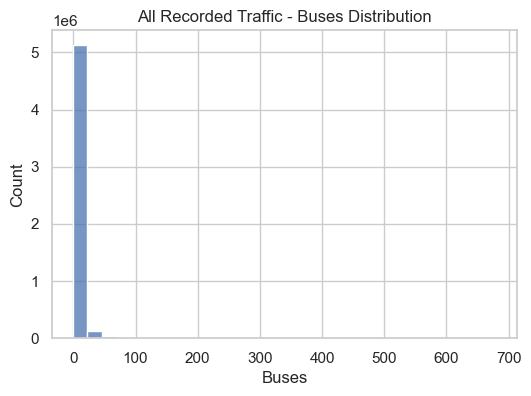

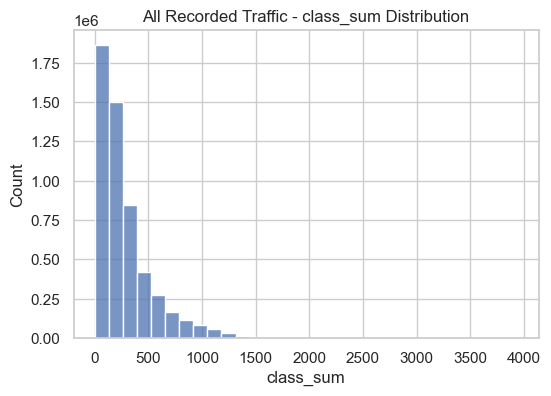

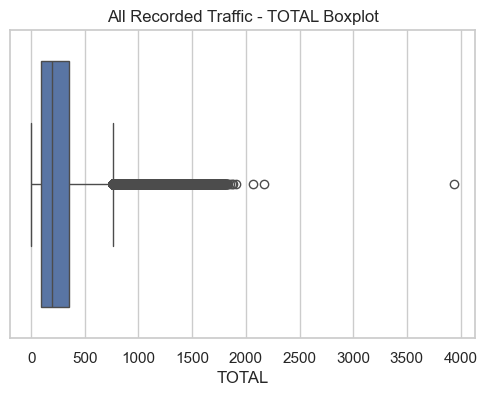

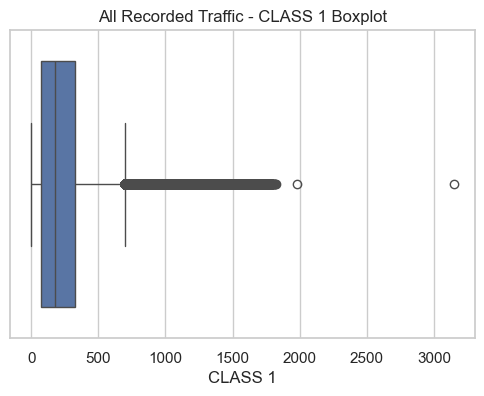

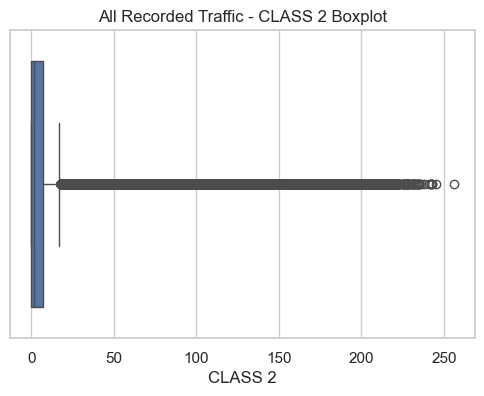

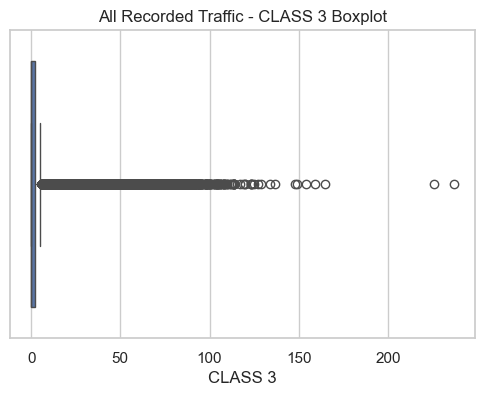

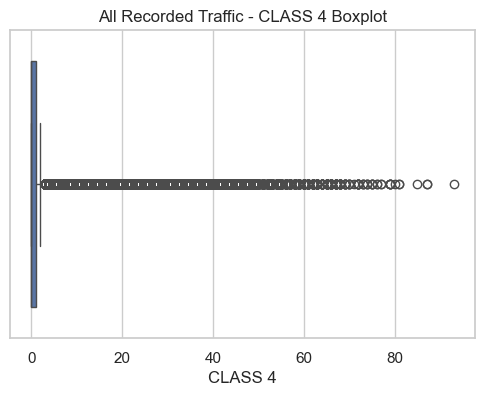

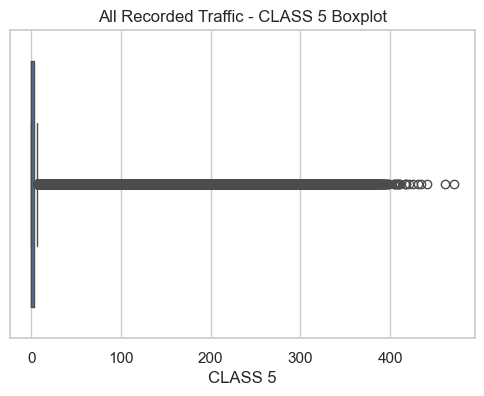

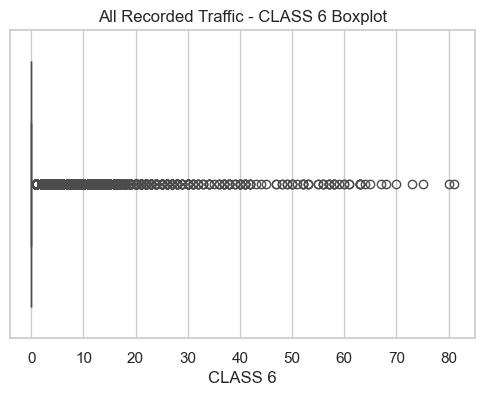

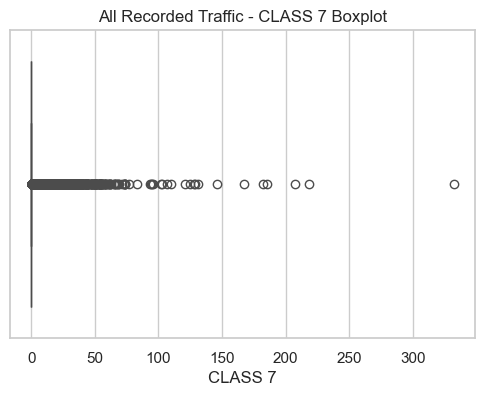

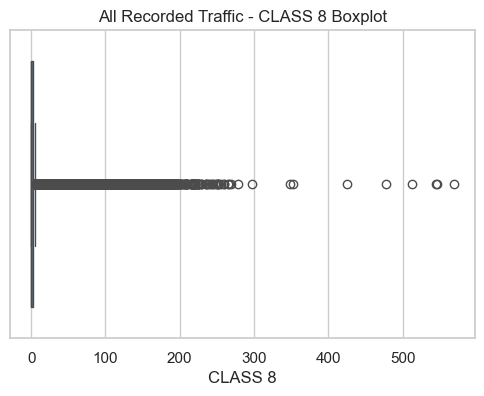

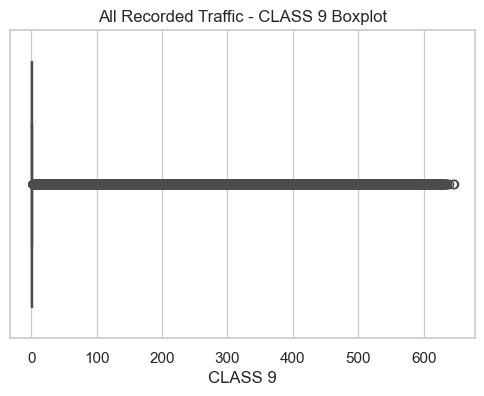

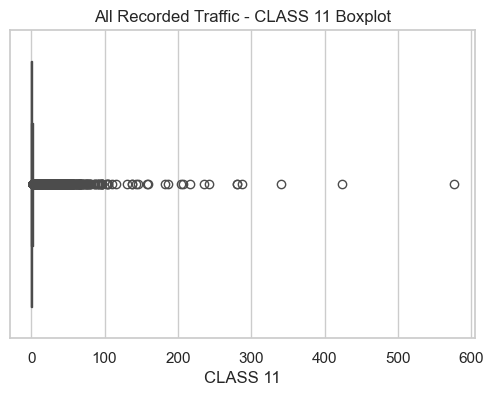

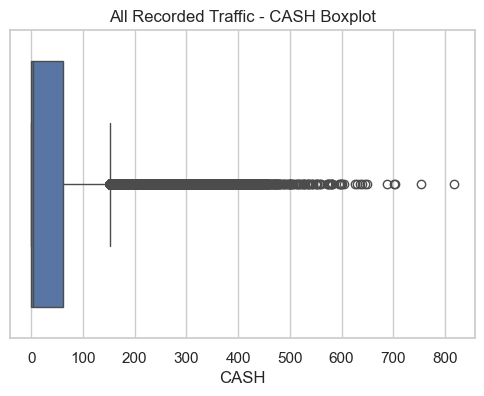

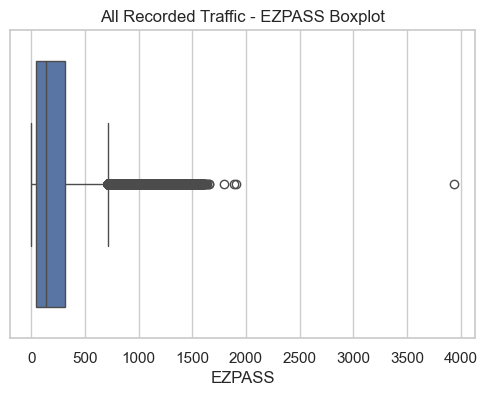

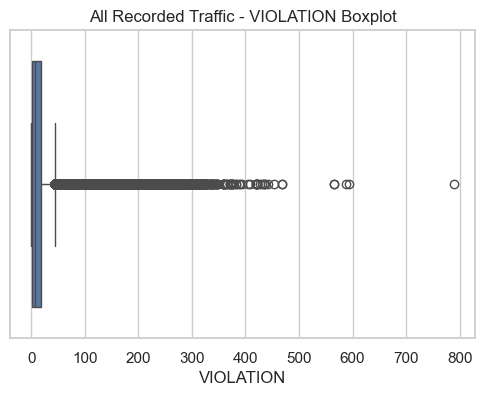

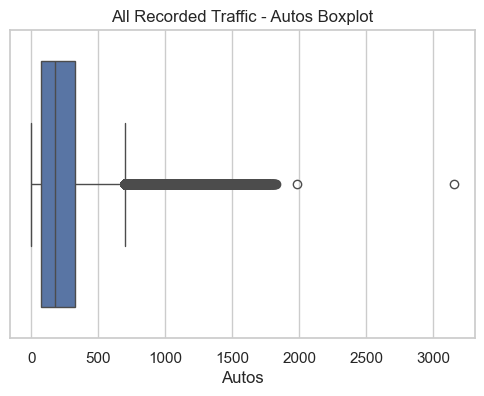

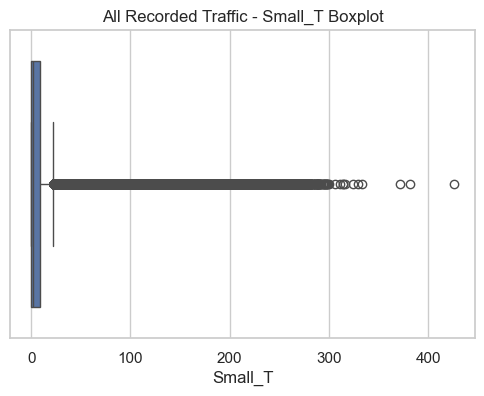

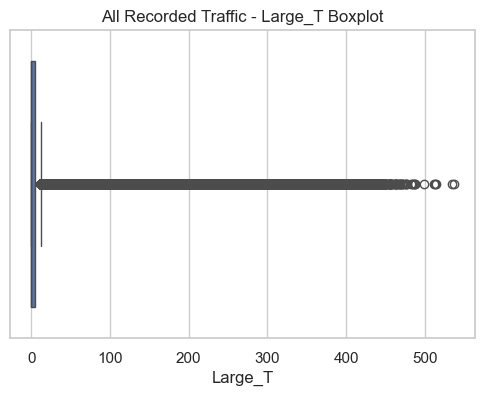

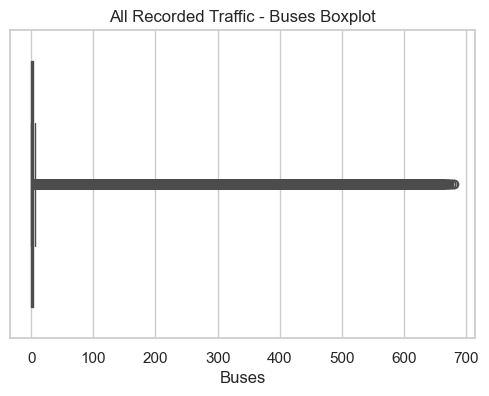

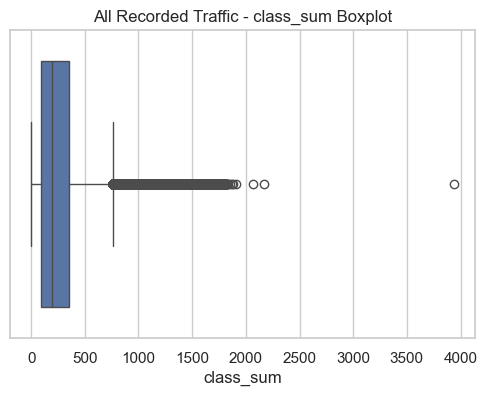

In [98]:
# --- Run EDA for each dataset ---
basic_eda(traffic, 'All Recorded Traffic')

In [ ]:
basic_eda(mobility, 'Facility Mobility Speeds')


========== EDA for Combined PABT Bus & Passenger ==========

Null values per column:
Start_Date          2
End_Date            2
Carrier_clean       2
Volume_Bus          0
Volume_Passenger    0
dtype: int64

Zero-length strings per column:
Start_Date: 0
End_Date: 0
Carrier_clean: 0

Number of distinct values per column:
Start_Date           233
End_Date             232
Carrier_clean         12
Volume_Bus           322
Volume_Passenger    1380
dtype: int64

Leading/trailing spaces per column:

Duplicate rows: 1

Numeric summary:
       Volume_Bus  Volume_Passenger
count     2798.00           2798.00
mean       220.60           6146.69
std        612.99          17993.34
min          0.00              0.00
25%         18.00            474.00
50%         29.00            790.50
75%         61.00           1493.75
max       2577.00          90225.00


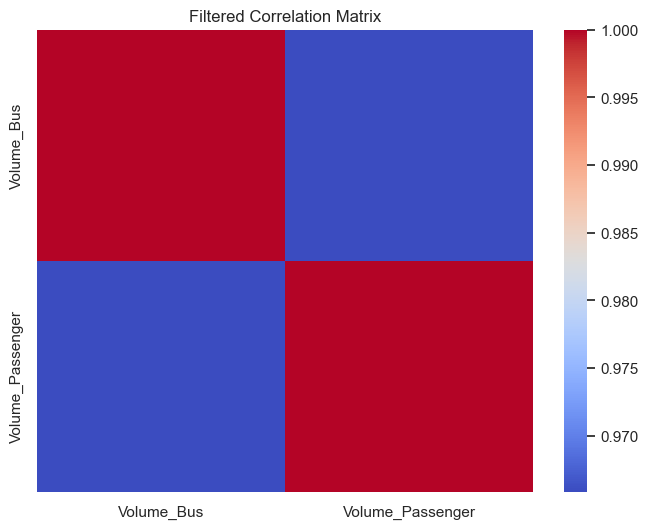

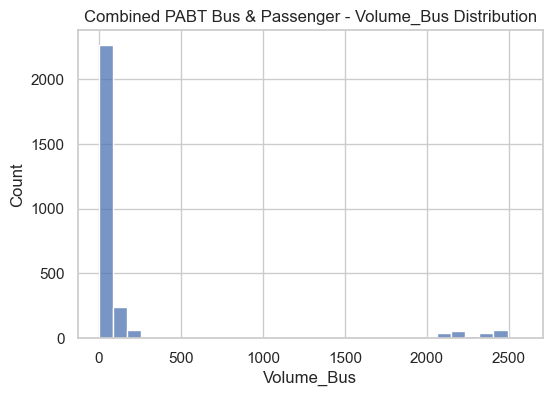

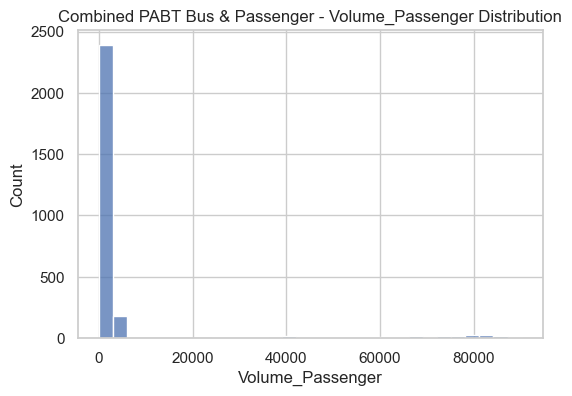

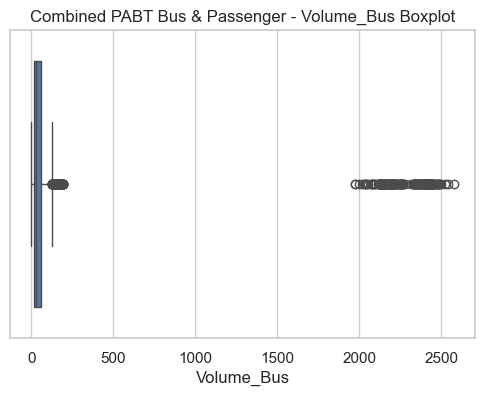

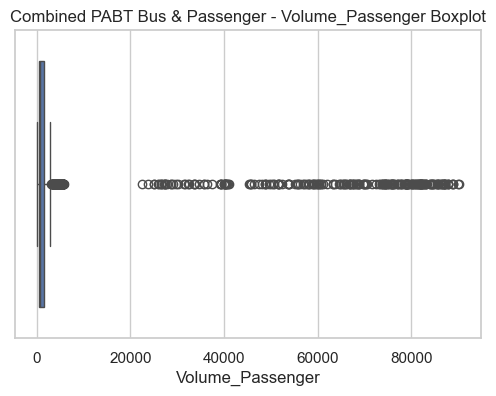

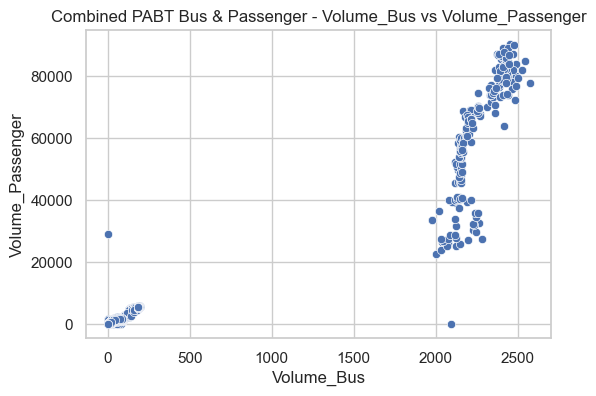

In [96]:
basic_eda(bus_pass, 'Combined PABT Bus & Passenger')